In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
!ls log_files

'fitness_&_operator_probs_10_18_log.csv'
'fitness_&_operator_probs_10_20_log.csv'
'fitness_&_operator_probs_23_25_log.csv'
'fitness_&_operator_probs_23_26_log.csv'
'fitness_&_operator_probs_23_27_log.csv'
'fitness_&_operator_probs_23_28_log.csv'
'fitness_&_operator_probs_23_29_log.csv'
'fitness_&_operator_probs_23_30_log.csv'
'fitness_&_operator_probs_geno_log.csv'
'fitness_&_operator_probs_naive_log.csv'
'fitness_&_operator_probs_pheno_log.csv'
 results_10_20_log.csv
 results_algos_log.csv
 results_geno_log.csv
 results_GSGP_log.csv
 results_naive_log.csv
 results_operators_log.csv
 results_pheno_log.csv


In [62]:
df = pd.read_csv('log_files/results_algos_log.csv') 
df.head()

,Seed,Algorithm,time,mean_s_error,explained_variance,final_tree_size
0,1,DecisionTreeRegressor,0:00:00.020859,1.912903,0.012661,NaN
1,0,LinearRegression,0:00:00.027377,1.466464,0.300837,NaN
2,0,DecisionTreeRegressor,0:00:00.012406,2.429032,-0.374503,NaN
3,2,LinearRegression,0:00:00.007571,1.611409,0.386245,NaN
4,1,Random_Tree_Forest,0:00:00.048791,1.567258,-0.354600,NaN


In [63]:
df.groupby(["Algorithm"])["time"].mean()

DataError: No numeric types to aggregate

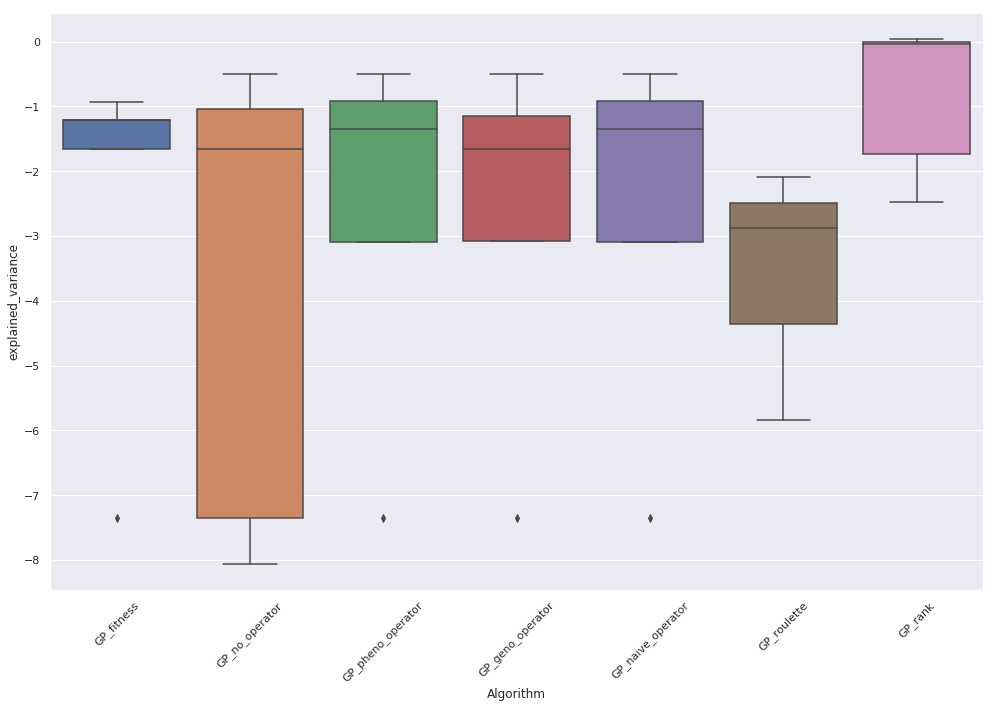

In [60]:
df2 = df[~(df["explained_variance"] <= -10)]
df2 = df2[df2.Algorithm != "GP_tournament"]
df2 = df2[df2.Algorithm != "GP_normal_fitness"]
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='Algorithm', y='explained_variance',data=df2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.tight_layout()

#plt.savefig('plots/algorithms_precision_recall_boxplots.png')

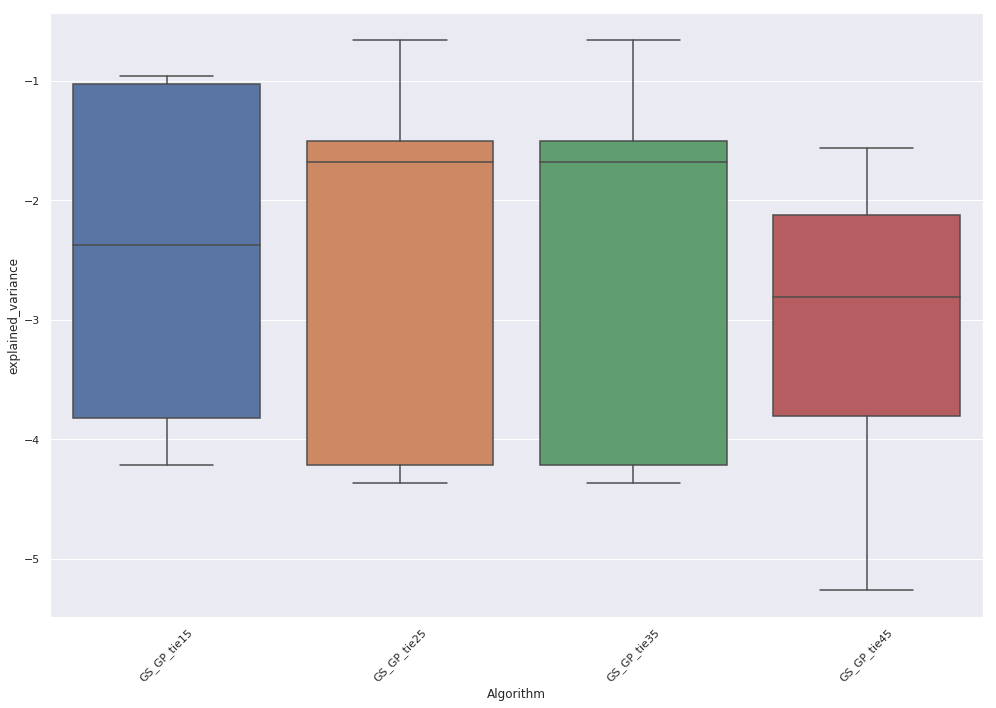

In [44]:
df_sort = df2.sort_values("Algorithm")

df_cross = df_sort.iloc[0:20]
df_edv = df_sort.iloc[21:40]
df_mut = df_sort.iloc[41:60]
df_neigh = df_sort.iloc[61:75]
df_tie = df_sort.iloc[76:]
    
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='Algorithm', y='explained_variance',data=df_tie)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.tight_layout()

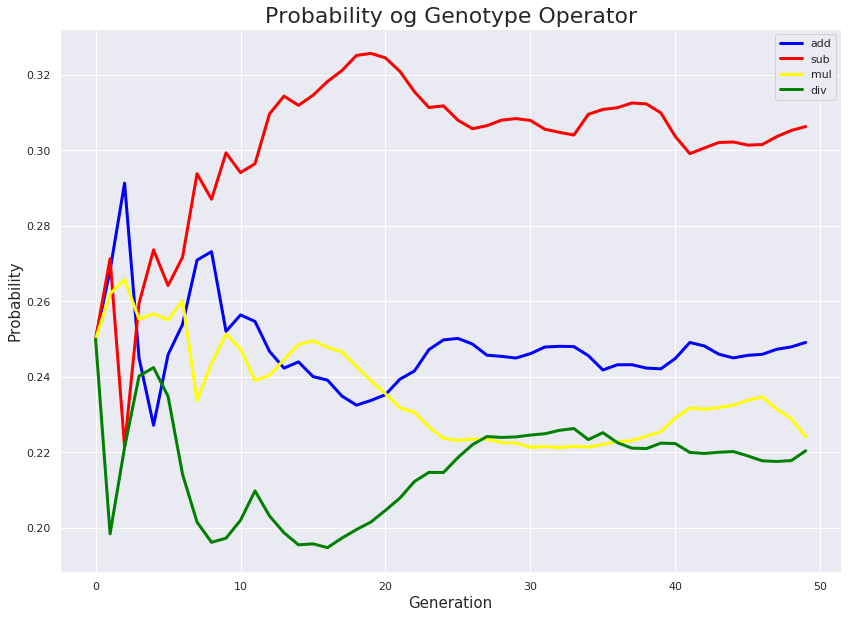

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

log_files = ['log_files/fitness_&_operator_probs_geno_log.csv'
             #'log_files/fitness_&_operator_probs_pheno_log.csv'
             #'log_files/fitness_&_operator_probs_naive_log.csv'
            ]

for log_file in log_files:
    
    df = pd.read_csv(log_file)

    df_groupby = df.groupby(["generation"])["add", "sub", "mul", "div"].mean().reset_index()

    plt.plot("generation", "add", data=df_groupby, color="blue", linewidth=3)
    plt.plot("generation", "sub", data=df_groupby, color="red", linewidth=3)
    plt.plot("generation", "mul", data=df_groupby, color="yellow", linewidth=3)
    plt.plot("generation", "div", data=df_groupby, color="green", linewidth=3)
    plt.legend()
    plt.xlabel("Generation", size=15)
    plt.ylabel("Probability", size=15)
    plt.title("Probability og Genotype Operator", size=22)

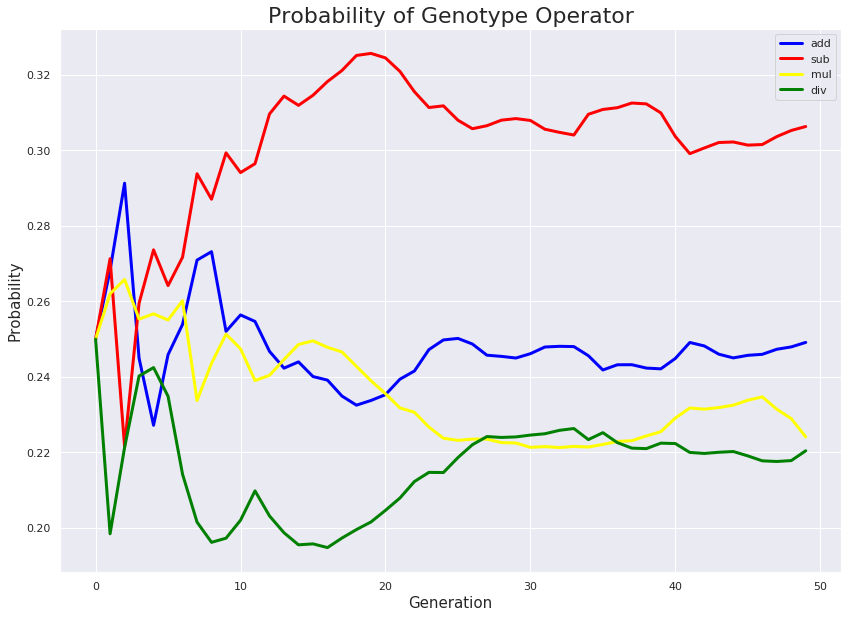

In [11]:
df = pd.read_csv('log_files/fitness_&_operator_probs_geno_log.csv')

df_groupby = df.groupby(["generation"])["add", "sub", "mul", "div"].mean().reset_index()

plt.plot("generation", "add", data=df_groupby, color="blue", linewidth=3)
plt.plot("generation", "sub", data=df_groupby, color="red", linewidth=3)
plt.plot("generation", "mul", data=df_groupby, color="yellow", linewidth=3)
plt.plot("generation", "div", data=df_groupby, color="green", linewidth=3)
plt.legend()
plt.xlabel("Generation", size=15)
plt.ylabel("Probability", size=15)
plt.title("Probability of Genotype Operator", size=22)

df_groupby[["%add", "%sub", "%mul", "%div"]] = df_groupby[["add", "sub", "mul", "div"]].diff().fillna(0)
df_count = df_groupby[["%add","%sub","%mul","%div"]][df_groupby[["%add","%sub","%mul","%div"]] > 0].count().to_frame().reset_index()
df_count.columns = ["function", "geno_count"]
df_count = df_count.set_index("function")

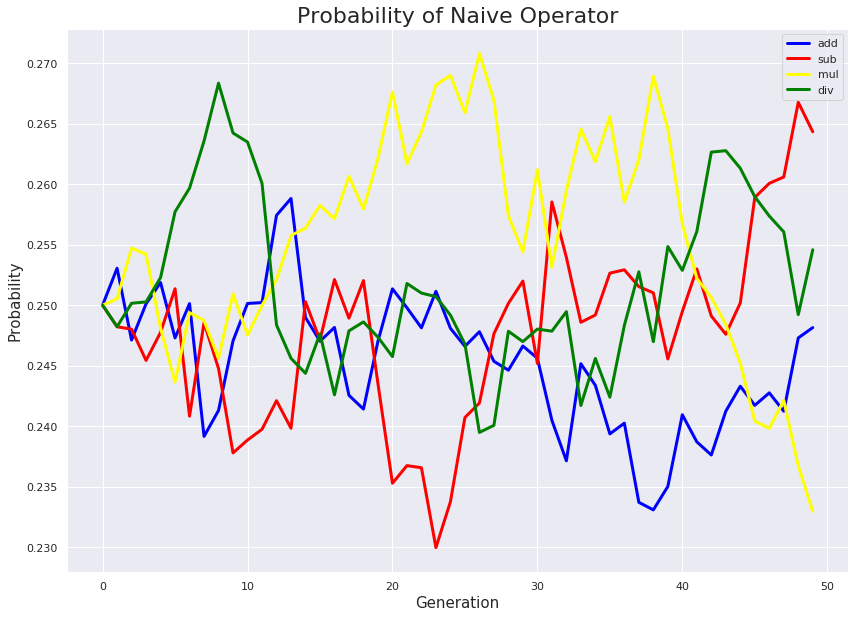

In [12]:
df = pd.read_csv('log_files/fitness_&_operator_probs_naive_log.csv')

df_groupby = df.groupby(["generation"])["add", "sub", "mul", "div"].mean().reset_index()

plt.plot("generation", "add", data=df_groupby, color="blue", linewidth=3)
plt.plot("generation", "sub", data=df_groupby, color="red", linewidth=3)
plt.plot("generation", "mul", data=df_groupby, color="yellow", linewidth=3)
plt.plot("generation", "div", data=df_groupby, color="green", linewidth=3)
plt.legend()
plt.xlabel("Generation", size=15)
plt.ylabel("Probability", size=15)
plt.title("Probability of Naive Operator", size=22)

df_groupby[["%add", "%sub", "%mul", "%div"]] = df_groupby[["add", "sub", "mul", "div"]].diff().fillna(0)
df_count2 = df_groupby[["%add","%sub","%mul","%div"]][df_groupby[["%add","%sub","%mul","%div"]] > 0].count().to_frame().reset_index()
df_count2.columns = ["function", "naive_count"]
df_count2 = df_count2.set_index("function")

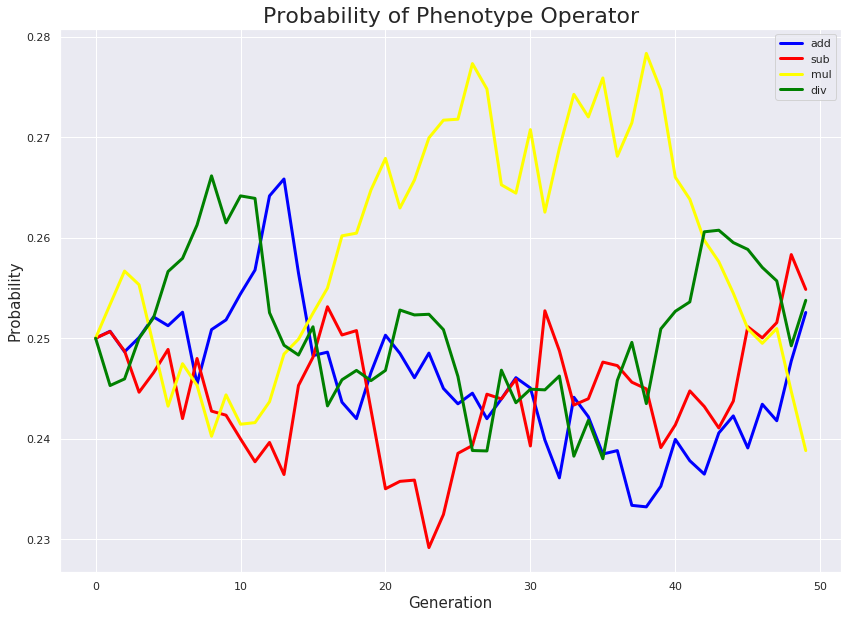

In [13]:
df = pd.read_csv('log_files/fitness_&_operator_probs_pheno_log.csv')

df_groupby = df.groupby(["generation"])["add", "sub", "mul", "div"].mean().reset_index()

plt.plot("generation", "add", data=df_groupby, color="blue", linewidth=3)
plt.plot("generation", "sub", data=df_groupby, color="red", linewidth=3)
plt.plot("generation", "mul", data=df_groupby, color="yellow", linewidth=3)
plt.plot("generation", "div", data=df_groupby, color="green", linewidth=3)
plt.legend()
plt.xlabel("Generation", size=15)
plt.ylabel("Probability", size=15)
plt.title("Probability of Phenotype Operator", size=22)

df_groupby[["%add", "%sub", "%mul", "%div"]] = df_groupby[["add", "sub", "mul", "div"]].diff().fillna(0)
df_count3 = df_groupby[["%add","%sub","%mul","%div"]][df_groupby[["%add","%sub","%mul","%div"]] > 0].count().to_frame().reset_index()
df_count3.columns = ["function", "pheno_count"]
df_count3 = df_count3.set_index("function")

In [15]:
df_groupby.head()

,generation,add,sub,mul,div,%add,%sub,%mul,%div
0,0,0.250000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000
1,1,0.250693,0.250658,0.253361,0.245287,0.000693,0.000658,0.003361,-0.004713
2,2,0.248649,0.248720,0.256686,0.245945,-0.002044,-0.001939,0.003325,0.000658
3,3,0.250066,0.244620,0.255326,0.249989,0.001417,-0.004100,-0.001360,0.004044
4,4,0.252119,0.246566,0.249273,0.252042,0.002053,0.001947,-0.006052,0.002053


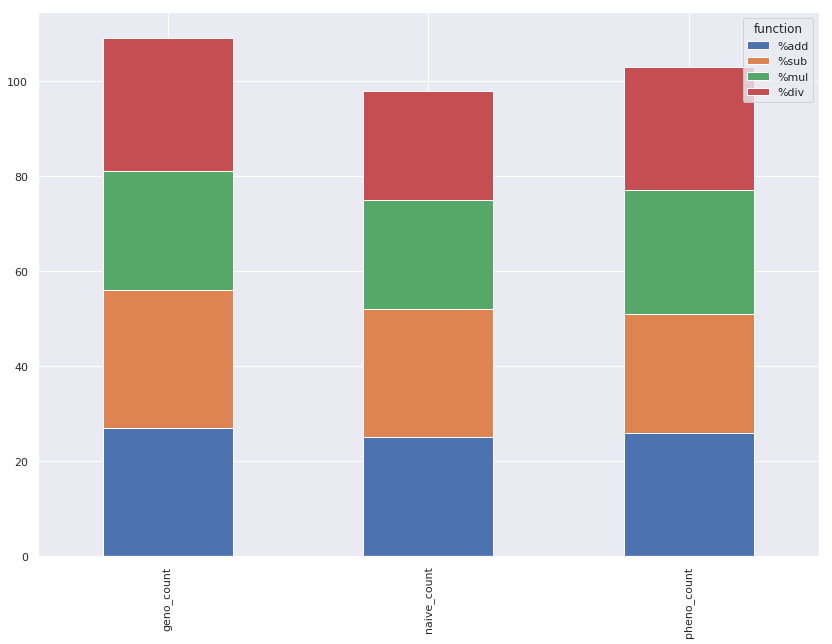

In [166]:
dfs = [df_count,df_count2,df_count3]
df_join = pd.concat(dfs, axis=1)
df_bar = df_join.T
df_bar.plot(kind="bar", stacked=True)